# Credit Card Fraud Exercise

For this exercise we will use a fake credit card dataset that is available from a public Kaggle dataset:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/versions/3?resource=download

Download and Load the credit card dataset from the left menu folder icon

Exercise 1.
- Basic Statistics

Exercise 2
- Data cleaning and processing

Exercise 3
- Build a predictive model for fraud.
- What explanatory variable was the most powerful predictor for fraud?


In [ ]:
# Install needed libraries
!pip install sklearn xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Prediction models code was obtained from the following link
# https://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc, from here on called towardsdatascience)

#Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from mpl_toolkits.axes_grid1 import host_subplot

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
#import statsmodels.formula.api as smf
#import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [ ]:
## Load Data
filename = 'creditcard.csv'
try:
  ccdata_csv = pd.read_csv(filename)
  print('Data appears to be formatted as a csv file not excel, so calling appropiate read_csv function')
except:
  raise ValueError(f'Remember to load file {filename}   or \
  You have not added a valid file')
ccdata_csv.head()

Data appears to be formatted as a csv file not excel, so calling appropiate read_csv function


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Histogram of Balance 


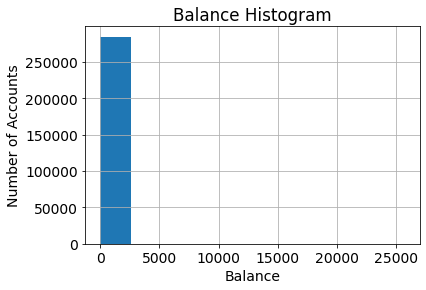

In [ ]:
# Histogram of the Amount for all the customers.
print('Histogram of Balance ')
plt.hist(ccdata_csv['Amount']);
plt.title('Balance Histogram')
plt.xlabel("Balance")
plt.ylabel("Number of Accounts");

To have a better look at Histogram classes we can filter the data.
Filtered data up to balance = 1000 is 98.92% of original data


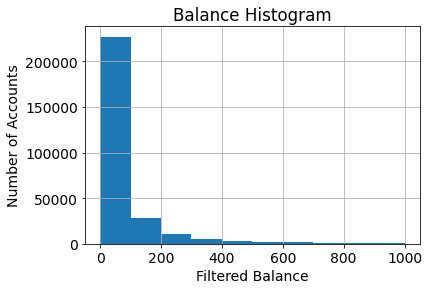

In [ ]:
# Histogram with filtered balance
limit = 1_000
filtered = ccdata_csv['Amount'][(ccdata_csv['Amount']) < limit]
balance_count = ccdata_csv['Amount'].count()
print('To have a better look at Histogram classes we can filter the data.')
print(f'Filtered data up to balance = {limit} is {(100*filtered.count()/balance_count):.2f}% of original data')
plt.hist(filtered);
plt.title('Balance Histogram')
plt.xlabel("Filtered Balance")
plt.ylabel("Number of Accounts");

In [ ]:
## Basic statistics on Dataset
print('Assigning data_csv dataframe to data \n')
data=ccdata_csv
data.rename(columns={'fraud':'Class'}, inplace=True)

# Code snippet from (towardsdatascience)
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}%'.format(fraud_percentage), attrs = ['bold']))


Assigning data_csv dataframe to data 

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17%


In [ ]:
print('As data has not null values there is no need to clean ')
ccdata_csv.info();

As data has not null values there is no need to clean 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float6

In [ ]:
tmp_data = ccdata_csv
X = tmp_data.drop('Class', axis = 1).values
y = tmp_data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 1)

def model_scores(X_train, X_test, y_train, y_test):
  DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
  DT.fit(X_train, y_train)
  dt_yhat = DT.predict(X_test)
  dt_ac = accuracy_score(y_test, dt_yhat)
  print('Accuracy score of the Decision Tree model is {}'.format(dt_ac))
  dt_f1 = f1_score(y_test, dt_yhat)
  print('F1 score of the Decision Tree model is {}'.format(dt_f1))
  confusion_matrix(y_test, dt_yhat, labels = [0, 1])

  KNN = KNeighborsClassifier(n_neighbors = 7)
  KNN.fit(X_train, y_train)
  knn_yhat = KNN.predict(X_test)
  knn_ac = accuracy_score(y_test, knn_yhat)
  print('Accuracy score of the K-Nearest Neighbors model is {}'.format(knn_ac))
  knn_f1 = f1_score(y_test, knn_yhat)
  print('F1 score of the K-Nearest Neighbors model is {}'.format(knn_f1))

  lr = LogisticRegression(solver='liblinear')
  lr.fit(X_train, y_train)
  lr_yhat = lr.predict(X_test)
  lr_ac = accuracy_score(y_test, lr_yhat)
  print('Accuracy score of the Logistic Regression model is {}'.format(lr_ac))
  lr_f1 = f1_score(y_test, lr_yhat)
  print('F1 score of the Logistic Regression model is {}'.format(lr_f1))

  svm = SVC()
  svm.fit(X_train, y_train)
  svm_yhat = svm.predict(X_test)
  svm_ac = accuracy_score(y_test, svm_yhat)
  print('Accuracy score of the Support Vector Machines model is {}'.format(svm_ac))
  svm_f1 = f1_score(y_test, svm_yhat)
  print('F1 score of the Support Vector Machines model is {}'.format(svm_f1))

  rf = RandomForestClassifier(max_depth = 4)
  rf.fit(X_train, y_train)
  rf_yhat = rf.predict(X_test)
  rf_ac = accuracy_score(y_test, rf_yhat)
  print('Accuracy score of the Random Forest model is {}'.format(rf_ac))
  rf_f1 = f1_score(y_test, rf_yhat)
  print('F1 score of the Random Forest model is {}'.format(rf_f1))

  xgb = XGBClassifier(max_depth = 4)
  xgb.fit(X_train, y_train)
  xgb_yhat = xgb.predict(X_test)
  xgb_ac = accuracy_score(y_test, xgb_yhat)
  print('Accuracy score of the XGBoost model is {}'.format(xgb_ac))
  xgb_f1 = f1_score(y_test, xgb_yhat)
  print('F1 score of the XGBoost model is {}'.format(xgb_f1))

  ac_arr = dt_ac, knn_ac, lr_ac, svm_ac, rf_ac, xgb_ac
  f1_arr = dt_f1, knn_f1, lr_f1, svm_f1, rf_f1, xgb_f1
  feat_importances = rf.feature_importances_

  return ac_arr, f1_arr, feat_importances

In [ ]:
print("Be patient, this takes a while... ")
ac_scores, f1_scores, feat_importances = model_scores(X_train, X_test, y_train, y_test)

Accuracy score of the Decision Tree model is 0.9993469284570659
F1 score of the Decision Tree model is 0.7842227378190256
Accuracy score of the K-Nearest Neighbors model is 0.9984410550265442
F1 score of the K-Nearest Neighbors model is 0.04310344827586207
Accuracy score of the Logistic Regression model is 0.9988623915058565
F1 score of the Logistic Regression model is 0.6009852216748767
Accuracy score of the Support Vector Machines model is 0.9984059436532682
F1 score of the Support Vector Machines model is 0.0
Accuracy score of the Random Forest model is 0.9993258616331002
F1 score of the Random Forest model is 0.7611940298507464
Accuracy score of the XGBoost model is 0.9995295075981012
F1 score of the XGBoost model is 0.8393285371702637


As you will see, the best 3 models by means of comparison or F1-Scores 
 and Accuracy metrics were Linear-Regression, Random-Forest and XG-BOOST


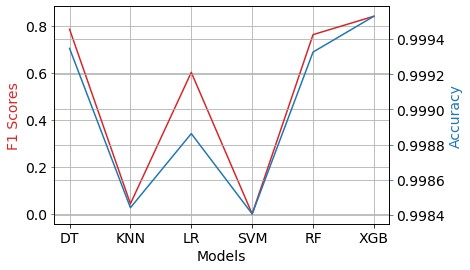

In [ ]:
fig, ax1 = plt.subplots()

labels = ['DT', 'KNN', 'LR', 'SVM', 'RF', 'XGB']

color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('F1 Scores', color=color)
ax1.plot(labels, f1_scores, color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(labels, ac_scores, color=color)
ax2.tick_params(axis='y', color=color)

print("As you will see, the best 3 models by means of comparison or F1-Scores \
\n and Accuracy metrics were Linear-Regression, Random-Forest and XG-BOOST")


What variable was the most powerful predictor for fraud?


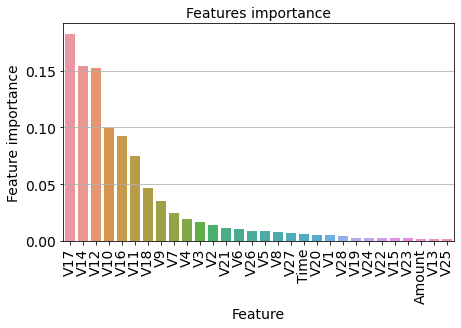

In [ ]:
# This code snippet was obtained from
# https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models

print("What variable was the most powerful predictor for fraud?")

predictors = ccdata_csv.columns.values.tolist()[:-1]
# feat_importances = rf.feature_importances_
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': feat_importances})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Nueva sección